In [12]:
# 구글드라이버 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
ls

test.csv  train.csv  train_label.csv


In [11]:
#시각화 라이브러리
import matplotlib as plt
import seaborn as sns

In [14]:
#데이터 라이브러리
import numpy as np
import pandas as pd

In [ ]:
DATA_COLUMN = 'title'
OUTPUT_COLUMN = 'output'
LABEL_COLUMN = 'category'
OUTPUT_CNT = 26

In [36]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('train_label.csv')

In [37]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [38]:
df_test_label

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [39]:
df_train.drop('id', axis=1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [43]:
# id drop
df_train.drop('id', axis=1)
# change categorical column to numeric
# pd.Series(np.where(df_train.Gender.values == 'Male', 1, 0), df_train.index)
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [52]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


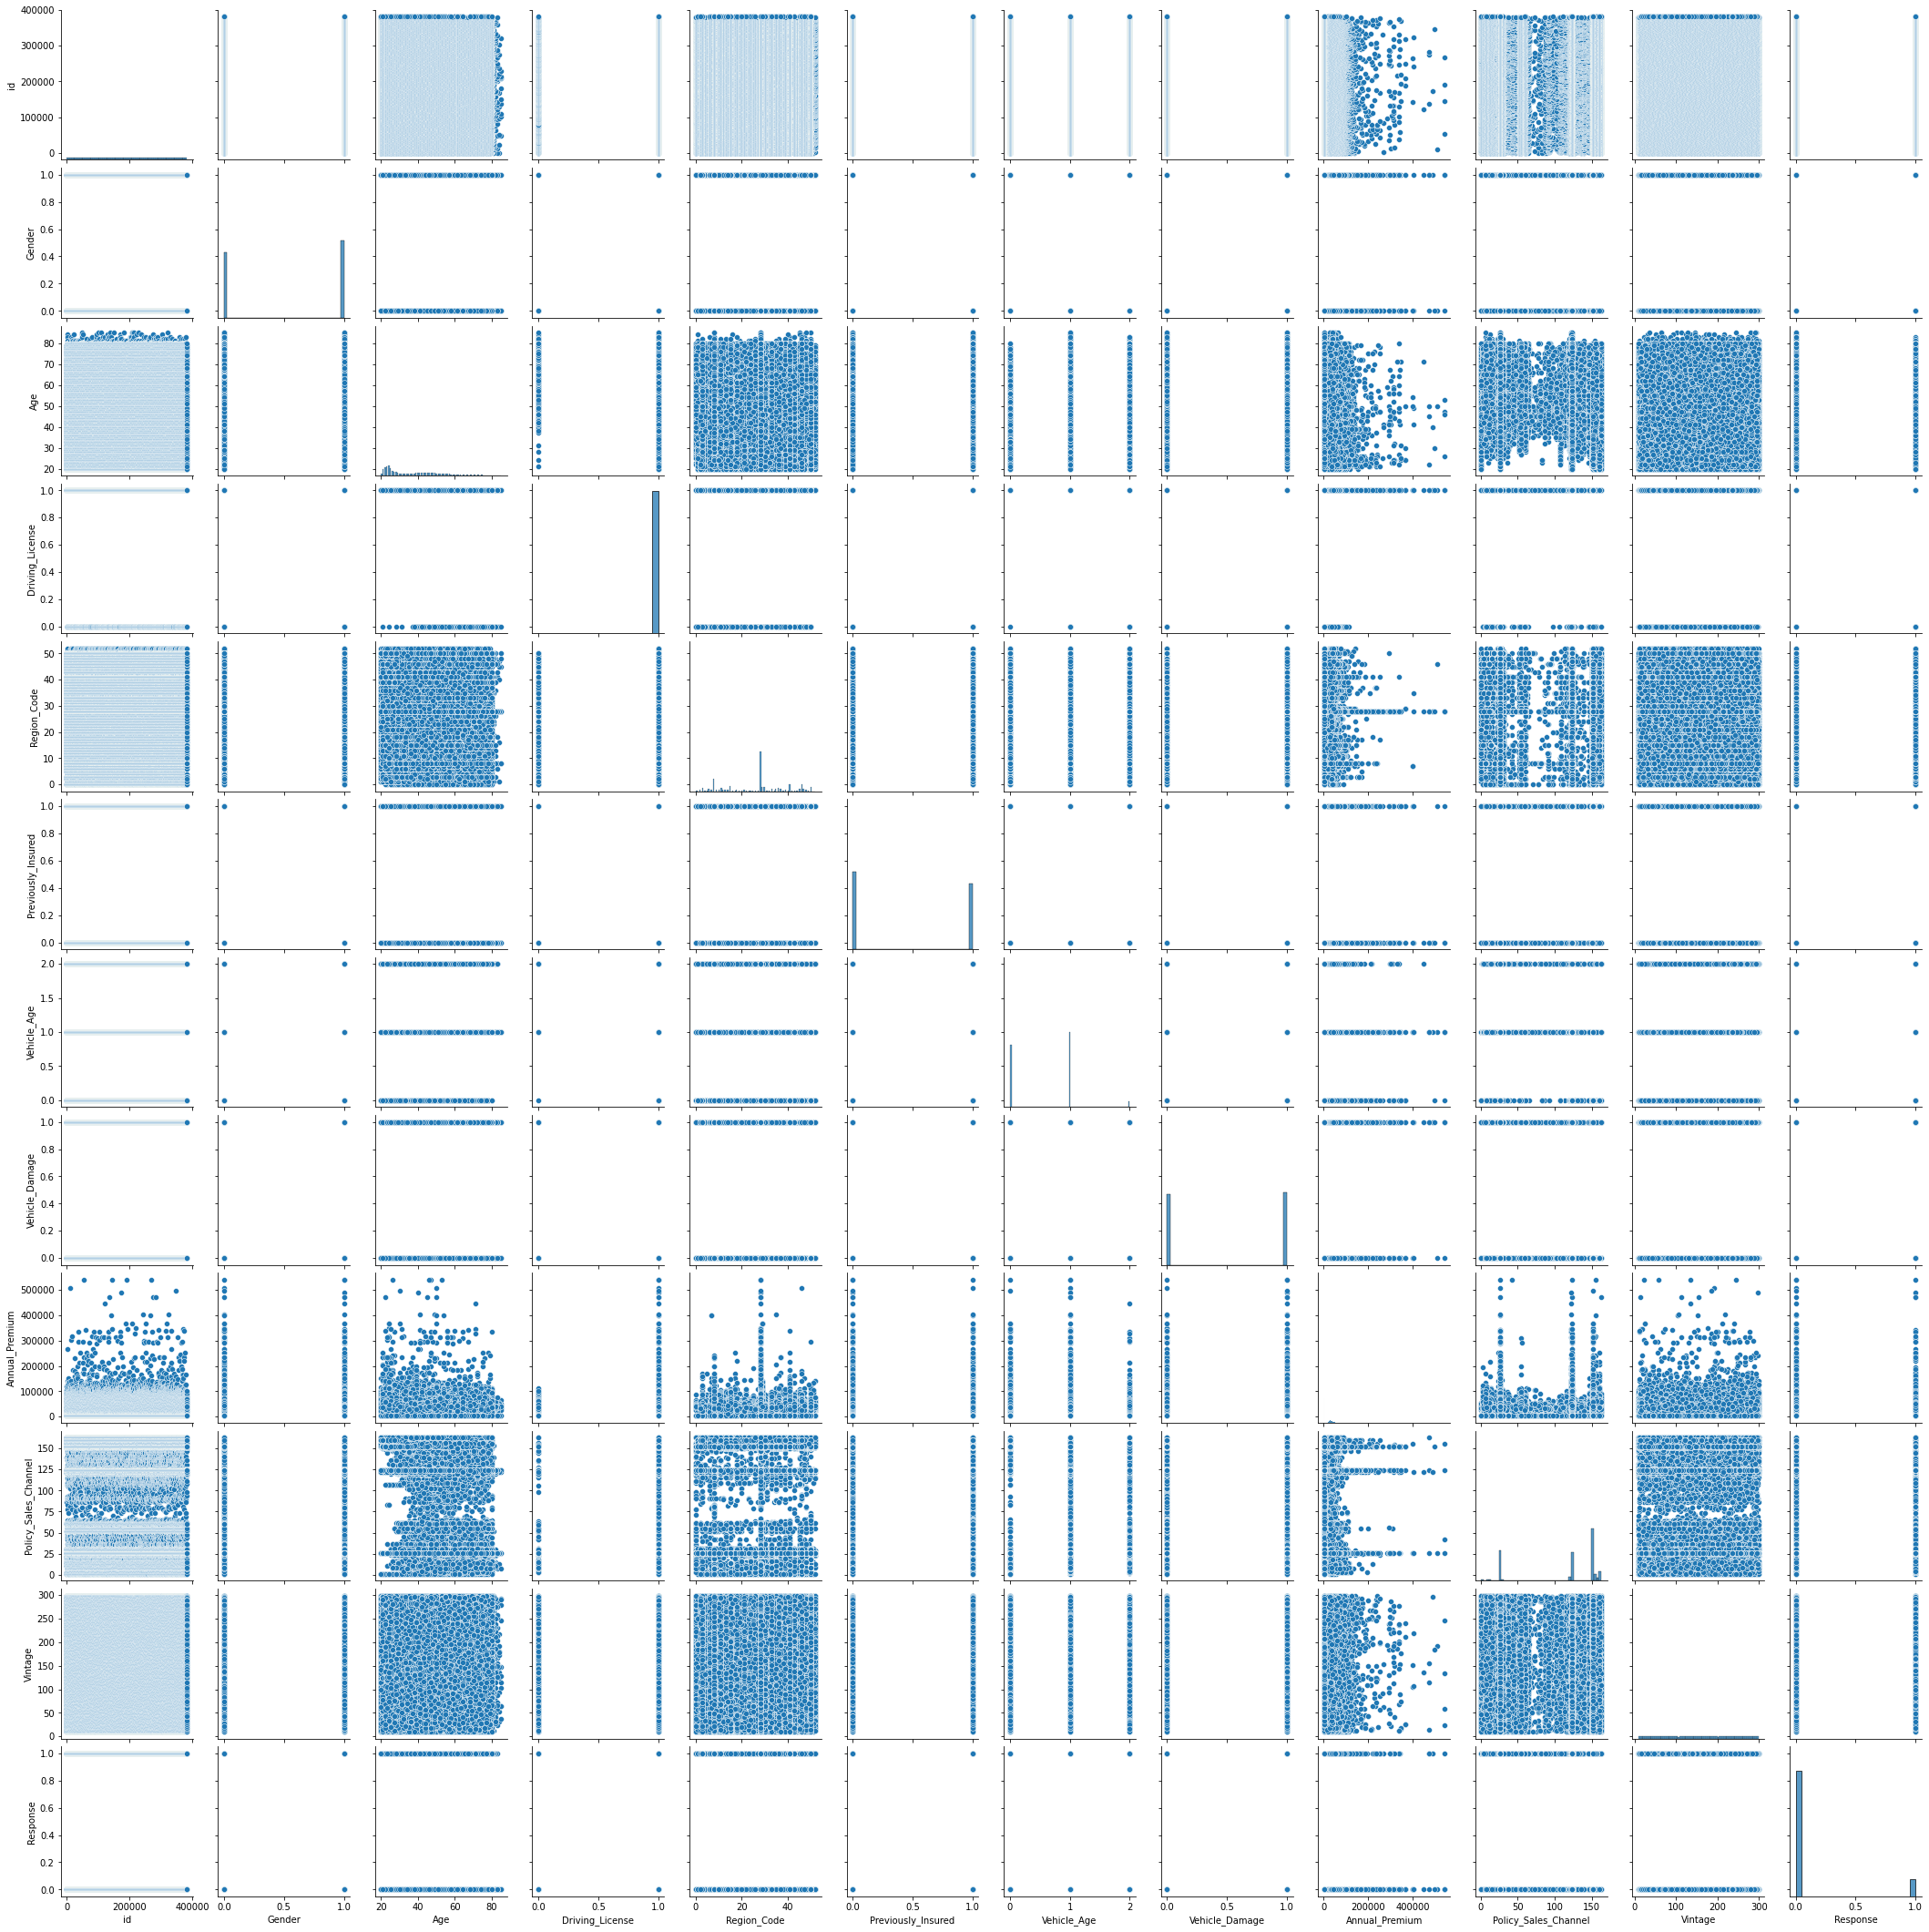

In [53]:
sns.pairplot(df_train, palette='his1')